In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import os
import numpy as np
import json
from dataclasses import dataclass

import torch
import torch.nn.functional as F
from torchvision.utils import save_image
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import webcolors

from minimal.imaging import draw_plan
from minimal.gen import generate_plan

%matplotlib inline

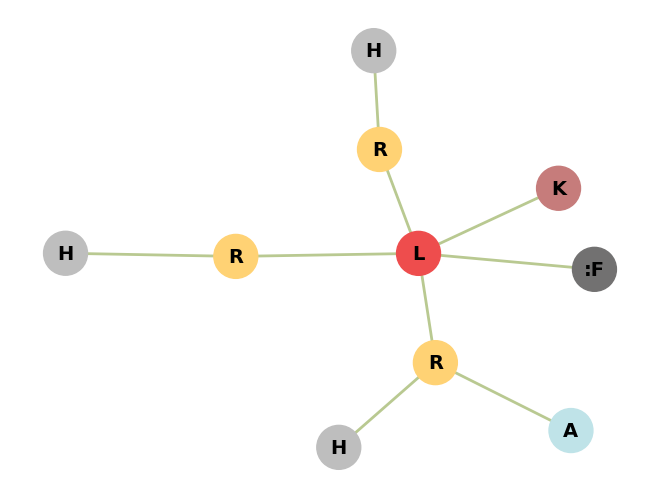

In [72]:
from minimal.layout import LayoutGraphBuilder, LayoutGraph, NodeType

bld = LayoutGraphBuilder()

liv = bld.add_node(NodeType.LIVING_ROOM)
kit = bld.add_node(NodeType.KITCHEN)
bal = bld.add_node(NodeType.BALCONY)
r1 = bld.add_node(NodeType.BEDROOM)
b1 = bld.add_node(NodeType.BATHROOM)
r2 = bld.add_node(NodeType.BEDROOM)
b2 = bld.add_node(NodeType.BATHROOM)
r3 = bld.add_node(NodeType.BEDROOM)
b3 = bld.add_node(NodeType.BATHROOM)
fr = bld.add_node(NodeType.FRONT_DOOR)

bld.add_edge(liv, fr)
bld.add_edge(liv, kit)
bld.add_edge(liv, r1)
bld.add_edge(liv, r2)
bld.add_edge(liv, r3)

bld.add_edge(r1, b1)
bld.add_edge(r2, b2)
bld.add_edge(r3, b3)
bld.add_edge(r3, bal)

g = bld.build()
# g.correct_doors()

g.draw()